In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # Ensure this line is present
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
df = pd.read_csv("/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv")
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [3]:
# Split features and target variable
X = df.loc[:, df.columns != 'class']
y = df.loc[:, 'class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the shapes of the datasets
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')



Shape of X_train: (248, 6)
Shape of y_train: (248,)
Shape of X_test: (62, 6)
Shape of y_test: (62,)


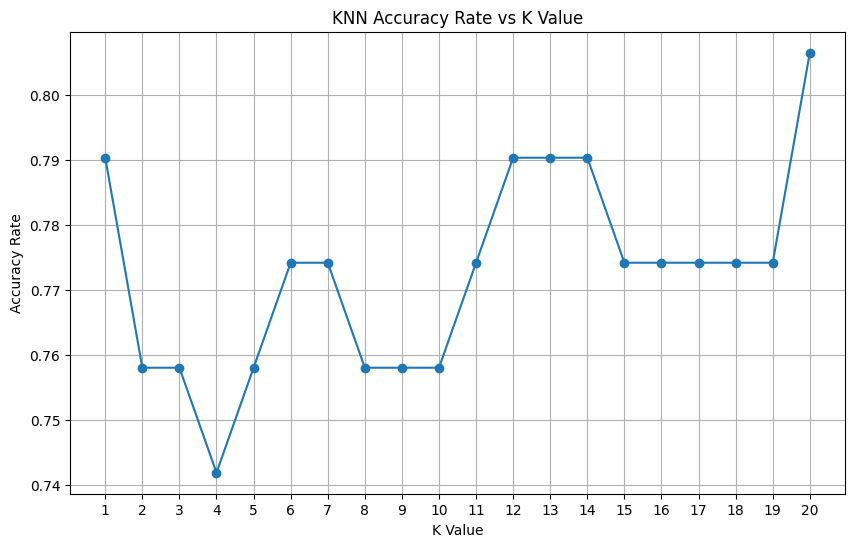

In [4]:
# Normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate accuracy for different k values
k_values = range(1, 21)  # k values from 1 to 20
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)  # Use accuracy_score here
    accuracies.append(accuracy)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')
plt.xticks(k_values)
plt.grid()
plt.show()


# In the graph, the values 1, 6, and 12 appear to be viable options. While 1 carries a risk of overfitting, we opted not to choose it. The value 12 covers a broader area, making it less specific. Therefore, 6 is considered the ideal choice.

In [5]:
# Set k value to 6
k = 6
knn = KNeighborsClassifier(n_neighbors=k)

# Ensure the variable names are correct
knn.fit(X_train, y_train)  # Make sure these are the correct variable names
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f'Accuracy of KNN with k={k}: {accuracy:.2f}')
#- `accuracy`: Represents a variable indicating the model's accuracy.
#- `:.2f`: 
  #- The `:` character indicates the start of the formatting.
  #- `.2`: Specifies that two decimal places should be shown for the number.
  #- `f`: Indicates that the number is of "float" type (decimal).

Accuracy of KNN with k=6: 0.77


### The accuracy of the K-Nearest Neighbors (KNN) model with \( k = 6 \) is 0.77. This indicates that we have reached our desired accuracy value of 0.77. This level of accuracy demonstrates that the model is performing well in classifying the instances in the dataset.

# ------CONFUSSİON MATRİX--------


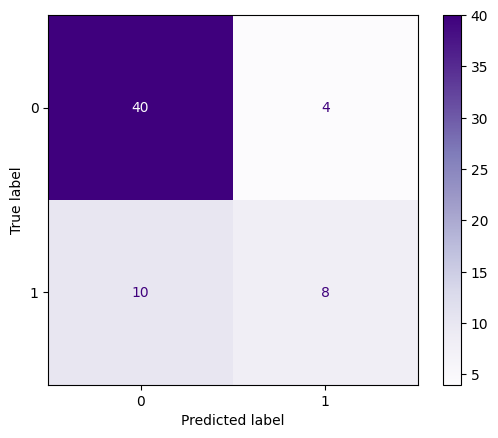

In [6]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Purples")  # Customize color scheme if needed
plt.show()

## According to the confusion matrix, our model is performing well in predicting the negative class (0), as we have 40 true negatives (TN) and only 4 false positives (FP). This means the model is accurately predicting the 0 class.

## However, we are making more errors in predicting the positive class (1). The model has 10 false negatives (FN), meaning it incorrectly predicts values that should be 1 as 0, and only 8 true positives (TP). This indicates that the model is struggling to correctly predict the 1 class. The high number of false negatives suggests that  the model has low sensitivity to the positive class (1).

## In summary, while our predictions are good for the negative class, we are making more mistakes in predicting the positive class.

## What Can Be Done to Fix This:
## Adjust the k Value: By changing the k value in the KNN model, you can potentially get better results. Lower k values may lead to more overfitting, while higher k ## values generally provide more balanced results.

## Address Class Imbalance: In cases where the positive class is underrepresented, you can use data balancing techniques like SMOTE to help the model learn the minority class better by generating more examples.

## Use Weighted Loss Function: You can give more weight to the positive class (1) during the model's learning process. This makes the model pay more attention to the positive class. In KNN, you can use weighted distances to achieve this.

## Try Different Models: If KNN is not giving the desired performance, you can try Logistic Regression, Random Forest, or XGBoost, as these models are generally more robust to class imbalance.

## Evaluate with Precision, Recall, and F1-Score: Instead of just accuracy, evaluate the model using precision, recall, and F1-score metrics. These are especially important when dealing with imbalanced datasets, as they give a better idea of how well the model is predicting each class.

# change knn

In [7]:
# Set k value to 12 (new)
k = 12
knn = KNeighborsClassifier(n_neighbors=k)

# Ensure the variable names are correct
knn.fit(X_train, y_train)  # Make sure these are the correct variable names
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# Print accuracy
print(f'Accuracy of KNN with k={k}: {accuracy:.2f}')

# Generate confusion matrix for k=12
conf_matrix_2 = confusion_matrix(y_test, predictions)
print("Confusion Matrix 2:")
print(conf_matrix_2)

Accuracy of KNN with k=12: 0.79
Confusion Matrix 2:
[[41  3]
 [10  8]]


## In this case, we're doing great with the negative predictions—41 true negatives (TN) and only 3 false positives (FP), so the model is really good at predicting the negative class. However, the higher number of negative values does make this result a bit expected. On the positive predictions, we're a bit behind, with 10 false negatives (FN) and only 8 true positives (TP). To improve this, you can try the techniques I mentioned earlier, like adjusting the k value, using data balancing methods, or even changing the model.

### This was just an experiment for me, but if it’s something important for your project, you can definitely focus on improving it.
# Good luck and have a great day!